# Data science project, housing market
- data from SSB with sqm prices from different municipalities
- compare and analyze in pandas

## Questions we seek to answer
- Generall pricing statistics over time
- Visualizing this by graphs
- Comparing factors that influence sqm price
    - Avg sqm pricing for each kommune
    - compare price and sale frequency


### 1. Import libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Read data as df


In [18]:
# Reading the uploaded CSV file, skipping the first row and using the second row as column headers
df = pd.read_csv('data_semi.csv', sep=';', encoding='ISO-8859-1', skiprows=1)
df

,region,boligtype,kvartal,Gjennomsnittlig kvadratmeterpris (kr),Antall boligomsetninger
count,23430,23430,23430,23430,23430
unique,110,3,71,8767,461
top,3001 Halden,Eneboliger,2006K1,.,.
freq,213,7810,330,12172,12172


### 3. Clean data/remove none values

In [17]:
# Replace both '.' and '..' with NaN
df.replace(['.', '..'], np.nan, inplace=True)

# Convert pandas NA to numpy NaN in the specific columns
df['Gjennomsnittlig kvadratmeterpris (kr)'] = pd.to_numeric(df['Gjennomsnittlig kvadratmeterpris (kr)'], errors='coerce')
df['Antall boligomsetninger'] = pd.to_numeric(df['Antall boligomsetninger'], errors='coerce')

# Remove rows where both 'Gjennomsnittlig kvadratmeterpris (kr)' and 'Antall boligomsetninger' are NaN
data_cleaned = df.dropna(subset=['Gjennomsnittlig kvadratmeterpris (kr)', 'Antall boligomsetninger'], how='all')

# Display the first few rows of the cleaned dataset
data_cleaned.head()


,region,boligtype,kvartal,Gjennomsnittlig kvadratmeterpris (kr),Antall boligomsetninger
56,3001 Halden,Eneboliger,2020K1,21216.0,35.0
57,3001 Halden,Eneboliger,2020K2,22759.0,64.0
58,3001 Halden,Eneboliger,2020K3,25283.0,69.0
59,3001 Halden,Eneboliger,2020K4,24944.0,52.0
60,3001 Halden,Eneboliger,2021K1,26665.0,31.0


### Present relevant statistics from the data

In [15]:
# 1. Basic statistics for the entire dataframe
basic_statistics = data_cleaned.describe()

basic_statistics

,Gjennomsnittlig kvadratmeterpris (kr),Antall boligomsetninger
count,10032.000000,11257.000000
mean,29158.910287,62.666785
std,11790.950962,150.066972
min,7120.000000,1.000000
25%,20647.000000,16.000000
50%,26742.000000,32.000000
75%,35049.000000,63.000000
max,99872.000000,2567.000000


### Average price by region

In [21]:
# Calculate the average price by region
average_price_by_region = data_cleaned.groupby('boligtype')['Gjennomsnittlig kvadratmeterpris (kr)'].mean().reset_index()

# Sort the table by average price in descending order for better visualization
average_price_by_region = average_price_by_region.sort_values(by='Gjennomsnittlig kvadratmeterpris (kr)', ascending=False)

average_price_by_region.head()

,boligtype,Gjennomsnittlig kvadratmeterpris (kr)
0,Blokkleiligheter,36223.135957
2,Småhus,27229.327068
1,Eneboliger,24348.821695


In [8]:
# 1. Summary of the average square meter price across different regions
avg_price_by_region = df.groupby('region')['Gjennomsnittlig kvadratmeterpris (kr)'].mean().sort_values(ascending=False)


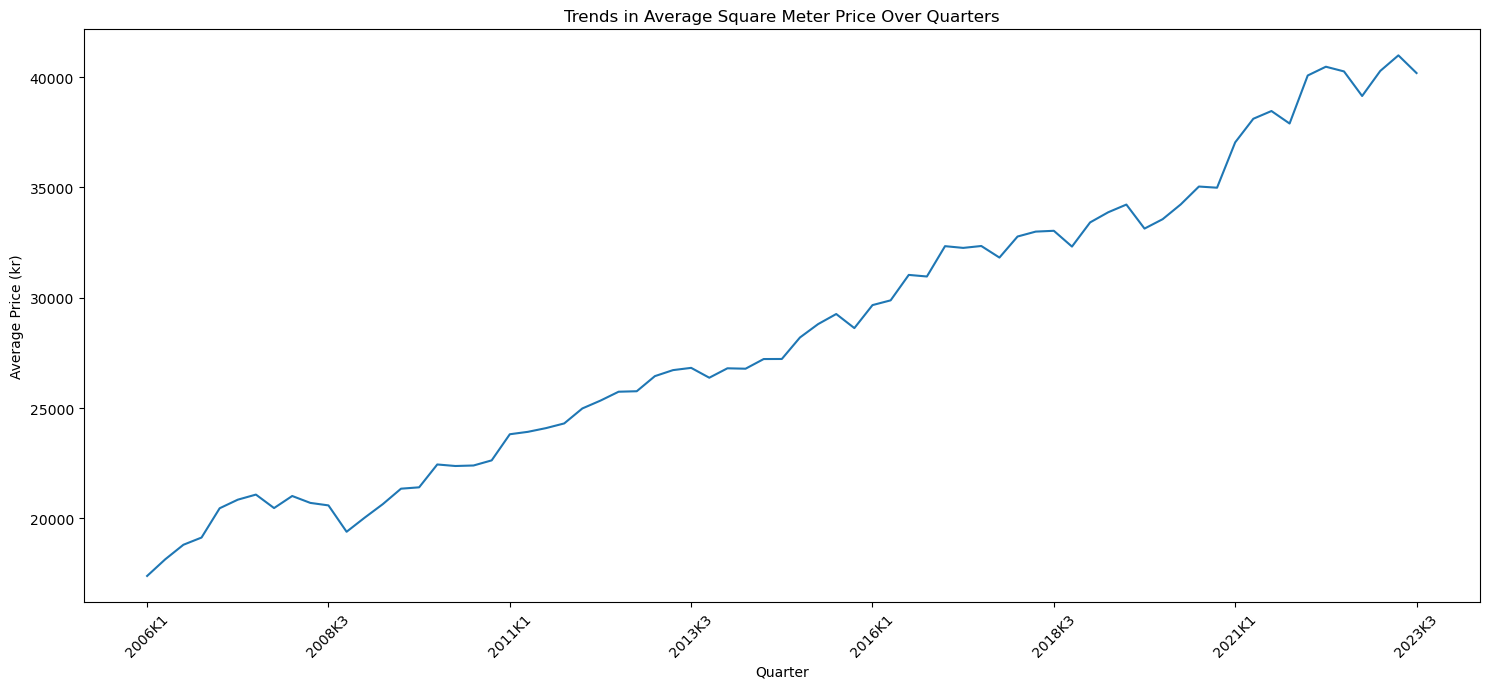

In [9]:
# 2. Trends in the average square meter price over the quarters
avg_price_by_quarter = df.groupby('kvartal')['Gjennomsnittlig kvadratmeterpris (kr)'].mean()

plt.figure(figsize=(15, 7))
avg_price_by_quarter.plot()
plt.title('Trends in Average Square Meter Price Over Quarters')
plt.ylabel('Average Price (kr)')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average price by region


Compare average price to amount of transactions, table?


Housing types and sqm price differences

Compare the omsetning to sqm price and visa verca to determine if omsetning amount means higher price